<a href="https://colab.research.google.com/github/sachin00028/ML_algorithms/blob/main/Concrete_strength_multiple_l_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/concrete_data.csv')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
y

array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ])

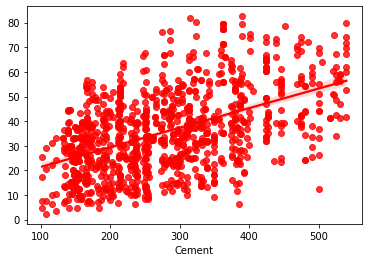

In [ ]:
import seaborn as sns
sns.regplot(x=df['Cement'],y=y,color='r')

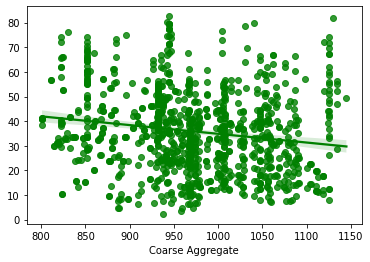

In [ ]:
sns.regplot(x=df['Coarse Aggregate'],y=y,color='g')

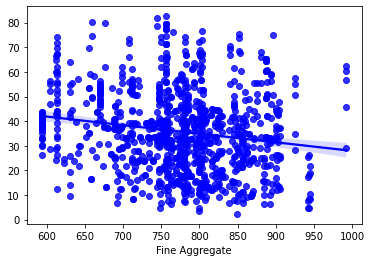

In [ ]:
sns.regplot(x=df['Fine Aggregate'],y=y,color='b')

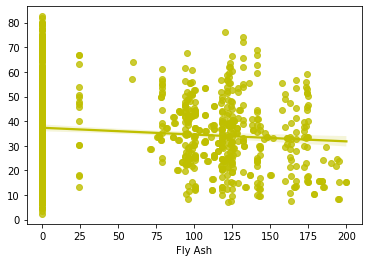

In [ ]:
sns.regplot(x=df['Fly Ash'],y=y,color='y')

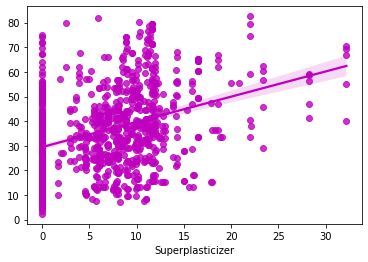

In [ ]:
sns.regplot(x=df['Superplasticizer'],y=y,color='m')

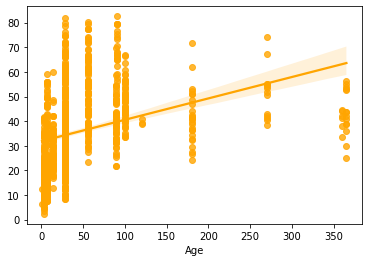

In [ ]:
sns.regplot(x=df['Age'],y=y,color='orange')

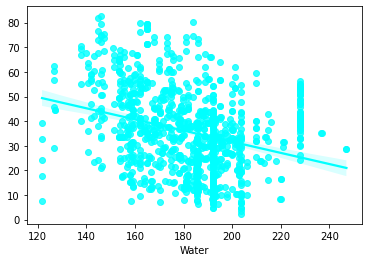

In [ ]:
sns.regplot(x=df['Water'],y=y,color='cyan')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[ 194.7,    0. ,  100.5, ..., 1006.4,  905.9,   28. ],
       [ 325. ,    0. ,    0. , ..., 1063. ,  783. ,    7. ],
       [ 318.8,  212.5,    0. , ...,  852.1,  880.4,    3. ],
       ...,
       [ 190.3,    0. ,  125.2, ..., 1079. ,  798.9,  100. ],
       [ 475. ,  118.8,    0. , ...,  852.1,  781.5,   28. ],
       [ 314. ,    0. ,  113. , ...,  925. ,  783. ,   28. ]])

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred
print(model.predict([[540.0 ,0.0 ,0.0 ,162.0 ,2.5 ,1055.0 ,676.0 ,28]]))

[51.88554343]


In [ ]:
print('Constant value',model.intercept_)

Constant value -59.61868838555984


In [ ]:
df1=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred})
df1

,Actual value,Predicted value
0,52.91,58.575598
1,55.90,52.456463
2,74.50,64.118945
3,35.30,52.000696
4,10.54,17.524168
...,...,...
304,24.92,25.387906
305,36.30,30.439215
306,32.33,36.691561
307,39.29,30.320562


In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 8.298580847947502


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print('Percentage',mean_absolute_percentage_error(y_test,y_pred))

Percentage 0.3218739295346848


In [ ]:
from sklearn.metrics import r2_score
print('R2 score',r2_score(y_test,y_pred))

R2 score 0.5943782479239206


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE',mean_squared_error(y_test,y_pred))

MSE 109.75080797014404


In [ ]:
from scipy.sparse.linalg.isolve.minres import sqrt
mse=109.75080797014404
rmse=sqrt(109.75080797014404)
print(rmse)

10.476201982118521
